In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})
pd.set_option('display.max_columns', 1500)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, cohen_kappa_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [23]:
def print_results(y_true, y_pred):
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print('F1-score:', f1_score(y_true, y_pred, average='macro'))
    print('cohen_kappa_score:', cohen_kappa_score(y_true, y_pred))
    # print('roc_auc-score:', roc_auc_score(y_true, y_pred, average='weighted', multi_class='ovo'))
def plot_validation_curve(model_grid, param_name, params=None):
    results_df = pd.DataFrame(model_grid.cv_results_)
    
    if params == None:
        plt.plot(results_df['param_'+param_name], results_df['mean_test_score'])
    else:
        plt.plot(params, results_df['mean_test_score'])

    plt.xlabel(param_name)
    plt.ylabel('Test F1 score')
    plt.title('Validation curve')
    plt.show()

In [24]:
df = pd.read_csv('age_final_numeric_corr_2.csv')
df.head()

,target,CALCULATION_METHOD_ID,DATA_VOLUME_WEEKDAYS,AVG_ARPU,phone_value,lifetime,how_long_same_model,ecommerce_score,MONOBANK,fb_volume,fb_count,instagram_volume,viber_volume,viber_count,youtube_volume,youtube_count,google_volume,google_count,gmail_volume,gmail_count,twitter_volume,twitter_count,itunes_volume,snapchat_volume,snapchat_count,linkedin_volume,linkedin_count,badoo_count,applemaps_volume,applemaps_count,cafe,entertain,1020,370,4659,5724,Apple,CITRUS.UA,FACEBOOK,Google,Instagram,OLX,Telegram,V B,VKcom,Viber,monobank,device_brand_Apple,device_brand_Meizu,device_brand_Nokia,device_brand_Samsung,device_brand_Xiaomi,software_os_vendor_Nokia,software_os_vendor_Samsung,software_os_name_40,software_os_name_Android,software_os_name_iOS,device_type_rus_smartphone,SCORING_MEDIUM,SCORING_VERY LOW
0,2,1,97.518,119.665600,3.0,152.933333,22.0,0,0.0,1.2284,37.52,53.2015,1.5190,56.10,0.0234,2.00,10.7283,243.52,0.3263,6.71,0.0000,0.00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,8.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,1,1,0
1,2,1,193.537,63.873725,2.0,143.366667,1.0,1,0.0,12.4769,93.19,60.4140,1.4249,36.29,0.8938,1.68,7.3500,42.03,0.0000,0.00,0.0399,2.03,1.1109,0.0,0.0,0.0,0.0,0.0,0.2515,12.06,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,1,0,0
2,4,1,0.000,0.999992,4.0,122.100000,25.0,0,0.0,0.0000,0.00,0.0000,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,6,2,0.000,55.019458,4.0,143.200000,15.0,0,0.0,0.0000,0.00,0.0000,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,1,0,0,0,1,0
4,6,2,87.435,49.031008,3.0,196.300000,1.0,0,0.0,0.0688,5.61,0.0000,0.4792,23.77,0.0261,0.29,10.0046,193.81,0.0082,0.84,0.0071,0.45,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [25]:
labels = df['target']
df_mod = df.drop('target', axis=1)
df_mod.shape

(28430, 59)

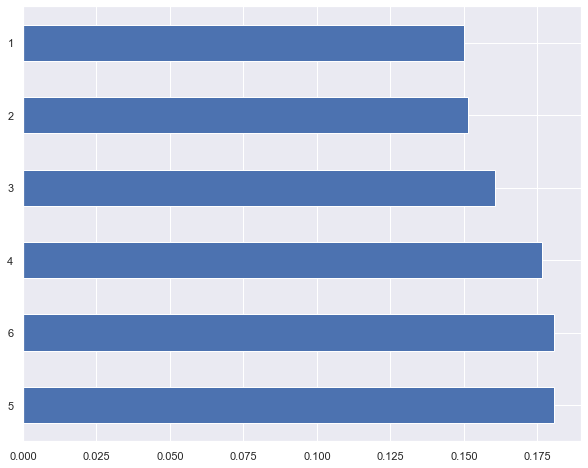

In [26]:
labels.value_counts(normalize=True).plot(kind='barh')
plt.show()

In [27]:
scaler = StandardScaler()
# features standartizing#
X = scaler.fit_transform(df_mod)

In [28]:
X_train, X_valid, y_train, y_valid = train_test_split(X, labels, test_size=0.15, random_state=16)

KNN

In [29]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
y_pred = knn.predict(X_valid)
print_results(y_valid, y_pred)

[[339 141  61  37  30  35]
 [250 225  71  49  23  21]
 [133 112 164 109 113  67]
 [ 79  55 166 223 152 100]
 [ 48  38  80 167 220 198]
 [ 39  17  56 110 201 336]]
              precision    recall  f1-score   support

           1       0.38      0.53      0.44       643
           2       0.38      0.35      0.37       639
           3       0.27      0.23      0.25       698
           4       0.32      0.29      0.30       775
           5       0.30      0.29      0.30       751
           6       0.44      0.44      0.44       759

    accuracy                           0.35      4265
   macro avg       0.35      0.36      0.35      4265
weighted avg       0.35      0.35      0.35      4265

F1-score: 0.3507762566128288
cohen_kappa_score: 0.22397902932379665


In [31]:
from sklearn.model_selection import GridSearchCV

# firstly, already tried range (1, 15), as curve indicated raising 
# trend, the range was shifted -> 37 best

knn_params={'n_neighbors': np.arange(25, 41, 2)}

knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='f1_macro')
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([25, 27, 29, 31, 33, 35, 37, 39])},
             scoring='f1_macro')

In [32]:
print(knn_grid.best_params_)
print(knn_grid.best_estimator_)
pd.DataFrame(knn_grid.cv_results_).T

{'n_neighbors': 33}
KNeighborsClassifier(n_neighbors=33)


,0,1,2,3,4,5,6,7
mean_fit_time,0.007211,0.005705,0.008002,0.006994,0.006214,0.006219,0.007904,0.006782
std_fit_time,0.001932,0.003028,0.001285,0.002097,0.000409,0.000519,0.00215,0.000642
mean_score_time,1.936987,2.020166,2.094441,1.989629,1.998975,2.020433,1.987862,2.084269
std_score_time,0.137266,0.07203,0.032392,0.081998,0.034694,0.08768,0.066704,0.118908
param_n_neighbors,25,27,29,31,33,35,37,39
params,{'n_neighbors': 25},{'n_neighbors': 27},{'n_neighbors': 29},{'n_neighbors': 31},{'n_neighbors': 33},{'n_neighbors': 35},{'n_neighbors': 37},{'n_neighbors': 39}
split0_test_score,0.376871,0.373086,0.377963,0.379837,0.378463,0.380183,0.378423,0.381452
split1_test_score,0.379199,0.382481,0.380884,0.382855,0.383631,0.380264,0.378176,0.377824
split2_test_score,0.372582,0.372846,0.373317,0.37794,0.379066,0.375796,0.379368,0.377641
split3_test_score,0.383683,0.3785,0.383835,0.384235,0.386324,0.382769,0.382878,0.383801


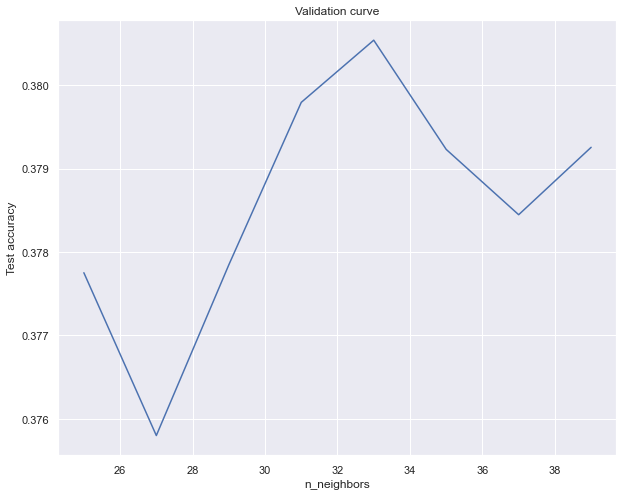

In [33]:
import matplotlib.pyplot as plt
results_df = pd.DataFrame(knn_grid.cv_results_)
plt.plot(results_df['param_n_neighbors'], results_df['mean_test_score'])

plt.xlabel('n_neighbors')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.show()

TREES

In [34]:
tree = DecisionTreeClassifier(max_depth=3, random_state=37)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_valid)
print_results(y_valid, y_pred)

[[306 240   7  36  21  33]
 [245 283  43  38   4  26]
 [185  73  91 193  70  86]
 [108  11  70 308 133 145]
 [ 71   6  17 229 145 283]
 [ 65   1   6 154 104 429]]
              precision    recall  f1-score   support

           1       0.31      0.48      0.38       643
           2       0.46      0.44      0.45       639
           3       0.39      0.13      0.20       698
           4       0.32      0.40      0.36       775
           5       0.30      0.19      0.24       751
           6       0.43      0.57      0.49       759

    accuracy                           0.37      4265
   macro avg       0.37      0.37      0.35      4265
weighted avg       0.37      0.37      0.35      4265

F1-score: 0.350484471075254
cohen_kappa_score: 0.2387153399159967


In [35]:
# from sklearn.tree import export_graphviz

# export_graphviz(tree, out_file='tree.dot', feature_names=df_mod.columns)
# print(open('tree.dot').read())

digraph Tree {
node [shape=box] ;
0 [label="CALCULATION_METHOD_ID <= 0.207\ngini = 0.832\nsamples = 24165\nvalue = [3626, 3662, 3866, 4241, 4389, 4381]"] ;
1 [label="lifetime <= 0.188\ngini = 0.813\nsamples = 14515\nvalue = [3296, 3428, 2841, 2178, 1559, 1213]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="instagram_volume <= -0.23\ngini = 0.741\nsamples = 9280\nvalue = [3127, 3079, 1464, 743, 444, 423]"] ;
1 -> 2 ;
3 [label="gini = 0.783\nsamples = 5902\nvalue = [1877, 1422, 1096, 675, 416, 416]"] ;
2 -> 3 ;
4 [label="gini = 0.61\nsamples = 3378\nvalue = [1250, 1657, 368, 68, 28, 7]"] ;
2 -> 4 ;
5 [label="instagram_volume <= -0.302\ngini = 0.782\nsamples = 5235\nvalue = [169, 349, 1377, 1435, 1115, 790]"] ;
1 -> 5 ;
6 [label="gini = 0.771\nsamples = 3893\nvalue = [99, 126, 825, 1112, 977, 754]"] ;
5 -> 6 ;
7 [label="gini = 0.731\nsamples = 1342\nvalue = [70, 223, 552, 323, 138, 36]"] ;
5 -> 7 ;
8 [label="fb_volume <= -0.361\ngini = 0.747\nsamples = 9650\nv

In [36]:
from IPython import display
display.Image('tree_59_features.png')

Best estimator by max depth: DecisionTreeClassifier(max_depth=6, random_state=37)
Best score by max depth: 0.4144563044774704


Text(0, 0.5, 'Mean accuracy on test set')

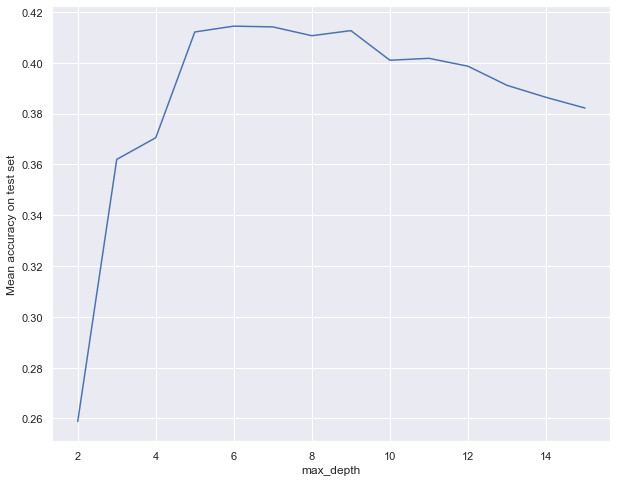

In [37]:
tree_params = {'max_depth': np.arange(2, 16)}

tree_grid = GridSearchCV(tree, tree_params, cv=5, scoring='f1_macro')
tree_grid.fit(X_train, y_train)
print('Best estimator by max depth:', tree_grid.best_estimator_)
print('Best score by max depth:', tree_grid.best_score_)

results_df = pd.DataFrame(tree_grid.cv_results_)
plt.plot(results_df['param_max_depth'], results_df['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('Mean accuracy on test set')

In [38]:
y_pred = tree_grid.best_estimator_.predict(X_valid)
print_results(y_valid, y_pred)

[[420 107  25  30  28  33]
 [280 241  66  15  16  21]
 [136  93 152 167  93  57]
 [ 65  33 111 304 172  90]
 [ 50   6  59 196 219 221]
 [ 35   8  17 112 178 409]]
              precision    recall  f1-score   support

           1       0.43      0.65      0.52       643
           2       0.49      0.38      0.43       639
           3       0.35      0.22      0.27       698
           4       0.37      0.39      0.38       775
           5       0.31      0.29      0.30       751
           6       0.49      0.54      0.51       759

    accuracy                           0.41      4265
   macro avg       0.41      0.41      0.40      4265
weighted avg       0.41      0.41      0.40      4265

F1-score: 0.4013603672500737
cohen_kappa_score: 0.29032692581969155


Best estimator by max features: DecisionTreeClassifier(max_depth=7, max_features=1.0, random_state=37)
Best score by max features: 0.41416133364704066


Text(0, 0.5, 'Mean accuracy on test set')

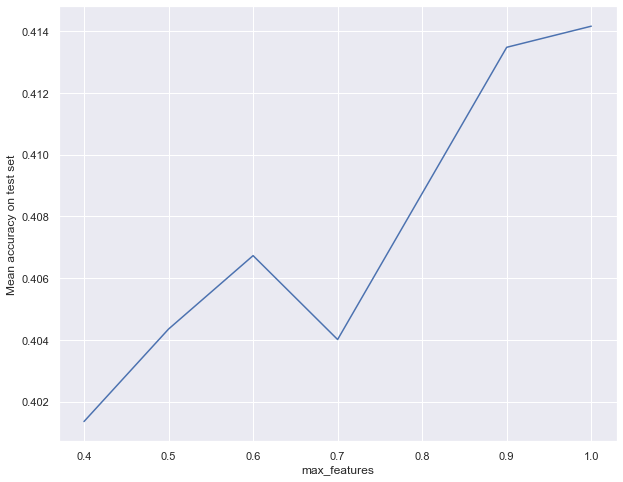

In [39]:
tree_params = {'max_features': np.array([0.4, 0.5, 0.6, 0.7, 0.9, 1.0]), 'max_depth': [7]}

tree_grid = GridSearchCV(tree, tree_params, cv=5, scoring='f1_macro')
tree_grid.fit(X_train, y_train)
print('Best estimator by max features:', tree_grid.best_estimator_)
print('Best score by max features:', tree_grid.best_score_)

results_df = pd.DataFrame(tree_grid.cv_results_)
plt.plot(results_df['param_max_features'], results_df['mean_test_score']) 
plt.xlabel('max_features')
plt.ylabel('Mean accuracy on test set')

In [40]:
tree_params = {'max_depth': np.arange(2, 11), 'min_samples_leaf': np.arange(2, 7),
                'min_samples_split': np.arange(2, 11), 'max_features': np.array([0.7, 0.8, 0.9])}

tree_grid = GridSearchCV(tree, tree_params, cv=5, scoring='accuracy') 
tree_grid.fit(X_train, y_train)

pd.DataFrame(tree_grid.cv_results_).T

print('Best estimator by max depth:', tree_grid.best_estimator_)
print('Best score by max depth:', tree_grid.best_score_)

Best estimator by max depth: DecisionTreeClassifier(max_depth=7, max_features=0.8, min_samples_leaf=2,
                       min_samples_split=8, random_state=37)
Best score by max depth: 0.42408441961514587


Feature ranking:
1 CALCULATION_METHOD_ID 0.2964602702367317
2 DATA_VOLUME_WEEKDAYS 0.2752695035086002
3 AVG_ARPU 0.11501528119135597
4 phone_value 0.07737546948479739
5 lifetime 0.03019489323976516


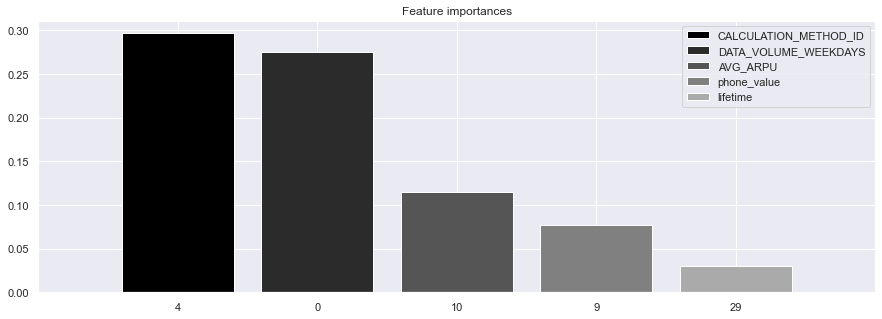

In [41]:
features = dict(zip(range(len(df_mod.columns)-1), df_mod.columns[:-1]))
best_tree = tree_grid.best_estimator_
importances = best_tree.feature_importances_
indices = np.argsort(importances)[::-1]
num_to_plot = 5
feature_indices = [ind for ind in indices[:num_to_plot]]

print('Feature ranking:')

for f in range(num_to_plot):
    print(f+1, features[f], 
    importances[indices[f]])

plt.figure(figsize=(15,5))
plt.title('Feature importances')
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
               color=([str(i/float(num_to_plot+1)) for i in range(num_to_plot)]),
               align='center')
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features[i]) for i in range(num_to_plot)])
# with eda changes calc_meth decrease from 0.43 -> 0.33 -> 0.296;
# data_volume rise from 0.23 -> 0.285#

LOGISTIC REGRESSION

In [42]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='multinomial')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_valid)
print_results(y_valid, y_pred)

[[375 144  34  23  28  39]
 [207 279  86  24  11  32]
 [ 96 102 182 135 107  76]
 [ 54  33 118 245 192 133]
 [ 36  14  46 132 251 272]
 [ 25   3  18  55 180 478]]
              precision    recall  f1-score   support

           1       0.47      0.58      0.52       643
           2       0.49      0.44      0.46       639
           3       0.38      0.26      0.31       698
           4       0.40      0.32      0.35       775
           5       0.33      0.33      0.33       751
           6       0.46      0.63      0.53       759

    accuracy                           0.42      4265
   macro avg       0.42      0.43      0.42      4265
weighted avg       0.42      0.42      0.42      4265

F1-score: 0.41788099832562353
cohen_kappa_score: 0.3084132489384033


In [43]:
log_reg = LogisticRegression(solver='lbfgs', penalty='l2', multi_class='multinomial')

C_values = {'C': np.logspace(-3, 3, 10)}
logreg_grid = GridSearchCV(log_reg, C_values, cv=5, scoring='f1_macro')
logreg_grid.fit(X_train, y_train)

print('LBFGS')
print(logreg_grid.best_params_)
print(logreg_grid.best_score_)
# with penalty worse result as lbfgs is a default solver - 19 features
# for 59 features the situation has changed

LBFGS
{'C': 0.46415888336127775}
0.42933909567725825


In [44]:
log_reg = LogisticRegression(solver='newton-cg', penalty='l2', multi_class='multinomial')

C_values = {'C': np.logspace(-3, 3, 10)}
logreg_grid = GridSearchCV(log_reg, C_values, cv=5, scoring='f1_macro')
logreg_grid.fit(X_train, y_train)

print('NEWTON-CG')
print(logreg_grid.best_params_)
print(logreg_grid.best_score_)

NEWTON-CG
{'C': 0.46415888336127775}
0.4294580723313686


In [45]:
log_reg = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5, multi_class='multinomial')
#  'saga' fast convergence is only guaranteed on features with approximately the same scale
C_values = {'C': np.logspace(-3, 1, 10)}
logreg_grid = GridSearchCV(log_reg, C_values, cv=5, scoring='f1_macro')
logreg_grid.fit(X_train, y_train)

print(logreg_grid.best_params_)
print(logreg_grid.best_score_)
# with not balanced classes - C = 0.001
# earlier it was several times only C = 10
# eda part changed this again to 0.46

{'C': 3.593813663804626}
0.42743484769191536


MLP CLASSIFIER

In [46]:
mlp_ad = MLPClassifier(solver='adam')
mlp_ad.fit(X_train, y_train)

y_pred = mlp_ad.predict(X_valid)
print_results(y_valid, y_pred)

[[344 156  43  38  21  41]
 [165 311  95  25  11  32]
 [ 80 108 200 136 107  67]
 [ 42  31 158 234 182 128]
 [ 33  24  65 125 258 246]
 [ 24   4  26  62 180 463]]
              precision    recall  f1-score   support

           1       0.50      0.53      0.52       643
           2       0.49      0.49      0.49       639
           3       0.34      0.29      0.31       698
           4       0.38      0.30      0.34       775
           5       0.34      0.34      0.34       751
           6       0.47      0.61      0.53       759

    accuracy                           0.42      4265
   macro avg       0.42      0.43      0.42      4265
weighted avg       0.42      0.42      0.42      4265

F1-score: 0.4212356794824603
cohen_kappa_score: 0.308459245289773


In [47]:
mlp_lbf = MLPClassifier(hidden_layer_sizes=(100, 50, 20), solver='lbfgs', alpha=0.001)
mlp_lbf.fit(X_train, y_train)

y_pred = mlp_lbf.predict(X_valid)
print_results(y_valid, y_pred)

[[320 165  55  39  25  39]
 [182 283  99  31  16  28]
 [ 86  93 206 146  95  72]
 [ 42  49 145 241 178 120]
 [ 36  19  62 151 228 255]
 [ 20  11  26  75 164 463]]
              precision    recall  f1-score   support

           1       0.47      0.50      0.48       643
           2       0.46      0.44      0.45       639
           3       0.35      0.30      0.32       698
           4       0.35      0.31      0.33       775
           5       0.32      0.30      0.31       751
           6       0.47      0.61      0.53       759

    accuracy                           0.41      4265
   macro avg       0.40      0.41      0.40      4265
weighted avg       0.40      0.41      0.40      4265

F1-score: 0.40453875578150894
cohen_kappa_score: 0.288882999352819


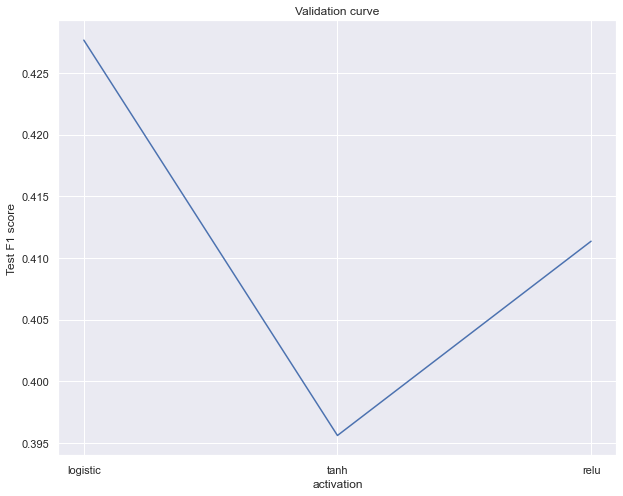

Best (hyper)parameters: {'activation': 'logistic'}
Best score: 0.4276627239309132
[[2481  491  233  104  143  174]
 [ 682 2256  475   72   69  108]
 [ 367  393 1866  485  458  297]
 [ 258  151  726 1472 1058  576]
 [ 170   87  417  554 1989 1172]
 [ 142   37  169  238 1044 2751]]
              precision    recall  f1-score   support

           1       0.61      0.68      0.64      3626
           2       0.66      0.62      0.64      3662
           3       0.48      0.48      0.48      3866
           4       0.50      0.35      0.41      4241
           5       0.42      0.45      0.43      4389
           6       0.54      0.63      0.58      4381

    accuracy                           0.53     24165
   macro avg       0.53      0.54      0.53     24165
weighted avg       0.53      0.53      0.53     24165

F1-score: 0.5314134432459202
cohen_kappa_score: 0.4356573610296215


In [48]:
param_grid = {'activation': ['logistic', 'tanh', 'relu']}
model_grid = GridSearchCV(mlp_ad, param_grid, cv=5, scoring='f1_macro', 
                          n_jobs=-1)
model_grid.fit(X_train, y_train)
plot_validation_curve(model_grid, 'activation')
print('Best (hyper)parameters:', model_grid.best_params_)
print('Best score:', model_grid.best_score_)
y_pred = model_grid.best_estimator_.predict(X_train)
print_results(y_train, y_pred)

SGD

In [49]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf_log = SGDClassifier(random_state = 42, loss='log')

In [50]:
sgd_clf.fit(X_train, y_train)
sgd_clf_log.fit(X_train, y_train)

SGDClassifier(loss='log', random_state=42)

In [51]:
from sklearn.metrics import accuracy_score

y_pred_sgd_clf = sgd_clf.predict(X_valid)
y_pred_sgd_clf_log = sgd_clf_log.predict(X_valid)

print(f1_score(y_valid, y_pred_sgd_clf, average='macro'))
print(f1_score(y_valid, y_pred_sgd_clf_log, average='macro'))

0.34192641657788564
0.36933030460016303
